Solution of the exercice where we have to write a 2-dimensional netCDF file.      
The main module we need is [NCDatasets](https://github.com/Alexander-Barth/NCDatasets.jl).

In [1]:
using NCDatasets

[ Info: Precompiling NCDatasets [85f8d34a-cbdd-5861-8df4-14fed0d494ab]


# Data
We create fake data: temperature as a random field, longitude and latitude as regularly spaced vectors.

In [2]:
dlon = 0.25;    # longitude resolution
dlat = 0.25;   # latitude resolution
lonmin = 27.;
lonmax = 42.;
latmin = 40.;
latmax = 48.;

In [3]:
lonvalues = collect(lonmin:dlon:lonmax);
latvalues = collect(latmin:dlat:latmax);
temperature = rand(length(latvalues), length(lonvalues));

In [4]:
temperature

33×61 Matrix{Float64}:
 0.805988   0.751098   0.956116   …  0.61748    0.680924   0.864846
 0.366133   0.561275   0.12723       0.686521   0.187595   0.154345
 0.576485   0.257354   0.885902      0.996255   0.445863   0.910978
 0.609268   0.135288   0.722852      0.733605   0.946361   0.941257
 0.874705   0.640873   0.716803      0.0397695  0.0714177  0.251693
 0.953444   0.351748   0.977496   …  0.021319   0.824355   0.539458
 0.366781   0.824444   0.038638      0.297206   0.298911   0.347753
 0.832877   0.901273   0.698807      0.220772   0.109607   0.575764
 0.548865   0.531523   0.625846      0.436512   0.336704   0.0968653
 0.241379   0.702701   0.389238      0.909042   0.64667    0.866403
 0.306453   0.25068    0.31949    …  0.196915   0.710931   0.0542914
 0.108824   0.0645186  0.678313      0.337296   0.611276   0.22147
 0.833555   0.577913   0.900771      0.905577   0.180488   0.733667
 ⋮                                ⋱                        ⋮
 0.348891   0.312654   0.791868

We can check the size of the temperature field:

In [5]:
@show size(temperature);
@show size(lonvalues)

size(temperature) = (33, 61)
size(lonvalues) = (61,)


(61,)

# NetCDF creation
First we create a dataset.     
We remove the file in case it already exists.

In [6]:
datafile = joinpath(datadir, "temp_exercise.nc")
if isfile(datafile)
    @info("File already exists, will remove it")
    rm(datafile)
end
ds = Dataset(datafile, "c");

LoadError: UndefVarError: `datadir` not defined

Then we define the dimensions (`lon` and `lat`):

In [7]:
length(lonvalues), length(latvalues)

(61, 33)

In [8]:
defDim(ds, "lon", length(lonvalues));
defDim(ds, "lat", length(latvalues));

LoadError: UndefVarError: `ds` not defined

We continue by defining the variables corresponding to the coordinates:

In [9]:
defVar(ds, "lon", Float64, ("lon",));
defVar(ds, "lat", Float64, ("lat",));

LoadError: UndefVarError: `ds` not defined

to which we can assign a value:

In [10]:
ds["lon"][:] = lonvalues;
ds["lat"][:] = latvalues;

LoadError: UndefVarError: `ds` not defined

Finally we define the temperature variable and assign a value to it:

In [11]:
T = defVar(ds, "temperature", Float64, ("lat", "lon"));
T[:] = temperature;
close(ds)

LoadError: UndefVarError: `ds` not defined

In [12]:
Dataset(datafile, "c") do ds
    ...
    ...
end

LoadError: syntax: invalid identifier name "..."

Note that we close the dataset with the last line.

We check if it worked, for example using [`ncdump`](https://www.unidata.ucar.edu/software/netcdf/netcdf-4/newdocs/netcdf/ncdump.html):
```julia
run(`ncdump temperature2D.nc`)
```

or with [ncview](http://meteora.ucsd.edu/~pierce/ncview_home_page.html):
```julia
run(`ncview temperature2D.nc`)
```

which should display something like this: ![ncview](./Images/netcdf-exercice.jpg)

In [13]:
using PyPlot

[ Info: Precompiling PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]


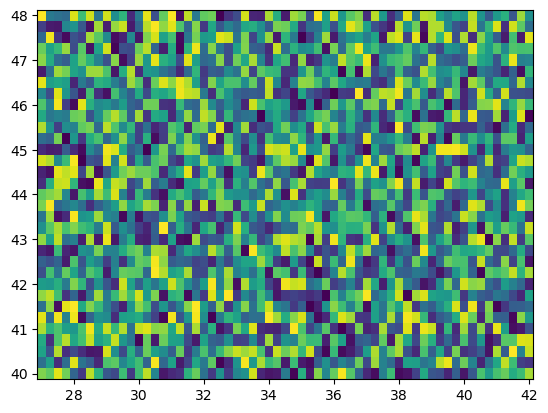

PyObject <matplotlib.collections.QuadMesh object at 0x78f589cf9d80>

In [14]:
pcolormesh(lonvalues, latvalues, temperature)